In [1]:
import pandas as pd
import numpy as np
import sys
#import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
sys.path.insert(1, '../Scripts')
from funciones import simbologia, grafico_edades

# Age

This function plots the radiocarbon ages measured in samples of organic matter (details below) either below, above or inside an eruption deposit. For each eruptions, the amount of radiocarbon estimate varies, it goes from __ to __ (details below).

This visualization aims to (work is being done to improve it) to show the uncertainty associated with the measuring technique (Accelerator Mass Spectrometer), for example sample__ has an ___ +- __ 14C age, whereas ssample__ has a __ __. 

Additionally, the uncertainty associated with the different radiocarbon ages at different positions is represented by plotting all the radocarbon ages asociated to an eruption as darker bars and the interval of time comprehended by all the radiocarbon ages with a more transparent rectangle.

In [9]:
Data = pd.read_excel("../Data/TephraDataBase_normalizado.xlsx")
Data = Data.replace(np.nan,-1)
Data = Data[(Data['14C_Age']!=-1)|(Data['HistoricalAge']!=-1)|(Data['40Ar39Ar_Age']!=-1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
Volcan       299 non-null category
Evento       299 non-null category
Edad         299 non-null float64
ErrorEdad    299 non-null float64
dtypes: category(2), float64(2)
memory usage: 9.8 KB
None


C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0, flags=flags)


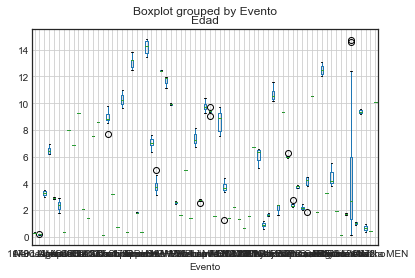

In [8]:
# Some of the data corresponds to historical events, thus no radiocarbon age estimate exists. 
# A visualition of this would be interesting in the future.
Data = pd.read_excel("../Data/TephraDataBase.xlsx")
Data_cores = pd.read_excel('../Data/DataCores.xlsx')
Data_cores = Data_cores.replace(np.nan,-1)
Data_cores = Data_cores[Data_cores.Edad != -1]
Data_cores = Data_cores[((Data_cores.Core == "MD07-3098")&((Data_cores.Depth == "805 cm")|(Data_cores.Depth == "30 cm")|(Data_cores.Depth == "1110 cm")))|((Data_cores.Core == "MD07-3100")&((Data_cores.Depth == "160 cm")|(Data_cores.Depth == "450 cm")|(Data_cores.Depth == "490 cm")|(Data_cores.Depth == "760 cm")|(Data_cores.Depth == "550 cm")|(Data_cores.Depth == "330 cm")|(Data_cores.Depth == "560 cm")))]
Data_cores = Data_cores.reset_index(drop=True)
Data['Historic'] = Data['Edad'].str.contains('Historic')
Data = Data[Data['Historic']!= True]
Data = Data.dropna(subset=['Edad'])
Data.Volcan = Data.Volcan.astype('category')
Data.Evento = Data.Evento.astype('category')
Data.Edad = Data.Edad.astype('float64')
Data.Edad = Data.Edad.values/1000
Data.ErrorEdad = Data.ErrorEdad.values/1000
Data = Data[['Volcan','Evento','Edad','ErrorEdad']]
Data = Data[(Data.Volcan != 'Unknown')|(Data.Evento != 'Unknown')]
Data = Data.reset_index(drop=True)
print(Data.info())
Data.boxplot('Edad','Evento')

In [4]:
import matplotlib.pyplot as plt

C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2001: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2099: RuntimeWarning: Glyph 8764 missing from current font.
  flags=LOAD_NO_HINTING)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:2001: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py

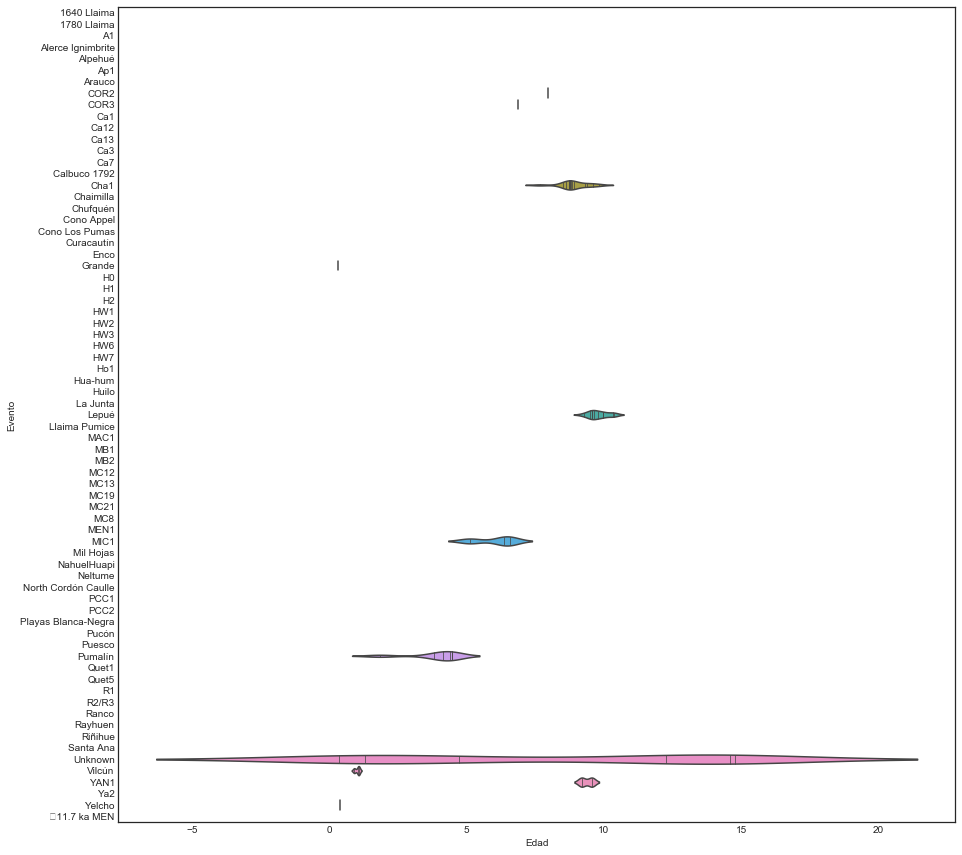

In [11]:
#sns.violinplot(x='day', y='total_bill',data=tips)
Data =  Data[(Data.Volcan == 'Chaitén')|(Data.Volcan == 'Michinmahuida')|(Data.Volcan == 'Yanteles')|(Data.Volcan == 'Corcovado')]
Data = Data.reset_index(drop=True)
#print(Data)
plt.figure(figsize=(15,15))
ax = plt.axes()
sns.violinplot(y='Evento', x='Edad',data=Data,scale="width", inner="stick", scale_hue=False, bw=.5)
plt.savefig('../Plots/Violines.pdf',dpi = 300,bbox_inches='tight')

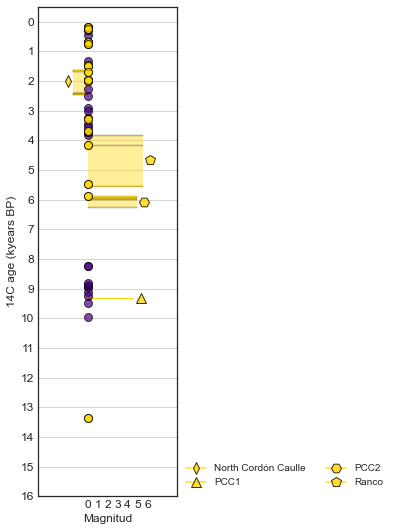

In [2]:
Data = pd.read_excel("../Data/TephraDataBase.xlsx")
Data = Data[Data.Volcan.isin(['Carrán-Los Venados','Puyehue-Cordón Caulle'])]
#Data_cores = pd.read_excel('../Data/DataCores.xlsx')
#Data_cores = Data_cores[Data_cores.Label.isin(['T1/100','T3/100','T5/100','T6/100','T8/100','T6/98','T8/98'])]
grafico_edades(Data)

A cualitative uncertainty is associated with the material that is measured, for instance charcoal that has been found inside the eruption deposit is likely to represent the age of a living tree in the moment of the eruption that was burned by the heat of it. Constrastingly, sometimes organic matter below the deposit of the eruption is measured, this value is more uncertain because it can represent a mix of organic matter of different ages and also it can be much older than the eruption.

Materials dated by radiocarbon: 
['Bulk Tephra' 'Oganic macrofossil' 'Charcoal' 'Organic mud'
 'Soil Organic matter' nan 'Organic macrofossil' 'Glass shards' 'Lapilli'
 'Bomb' 'Lava' 'Wood' 'Organic matter' 'Organic silt' 'Charred wood'
 'Paleosol' 'Partially burned wood' 'Peat' 'Wood (center of branch)'
 'Wood (outside of branch)' 'Plant Stem' 'Bulk organic matter'
 'Macro plant remains' 'Bulk sediment' 'Soil with charcoal' 'Whole rock'
 'Closed melt inclusions' 'Open melt inclusions' 'Organic soil'
 'Charred material' 'Organic sediment' 'Bulk gytja'
 'Bulk Higly carbonac. Muds' 'Bulk carbonac. Muds'
 'Partially Carbonised wood' 'Carbon flecks in organic rich Soil'
 'Bulk Glass' 'Charcoal, twigs']
 
Ages obtained by measuring Charcoal, Wood, Charred wood


../Scripts\funciones.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Data['Historic'] = Data['Edad'].str.contains('Historic')


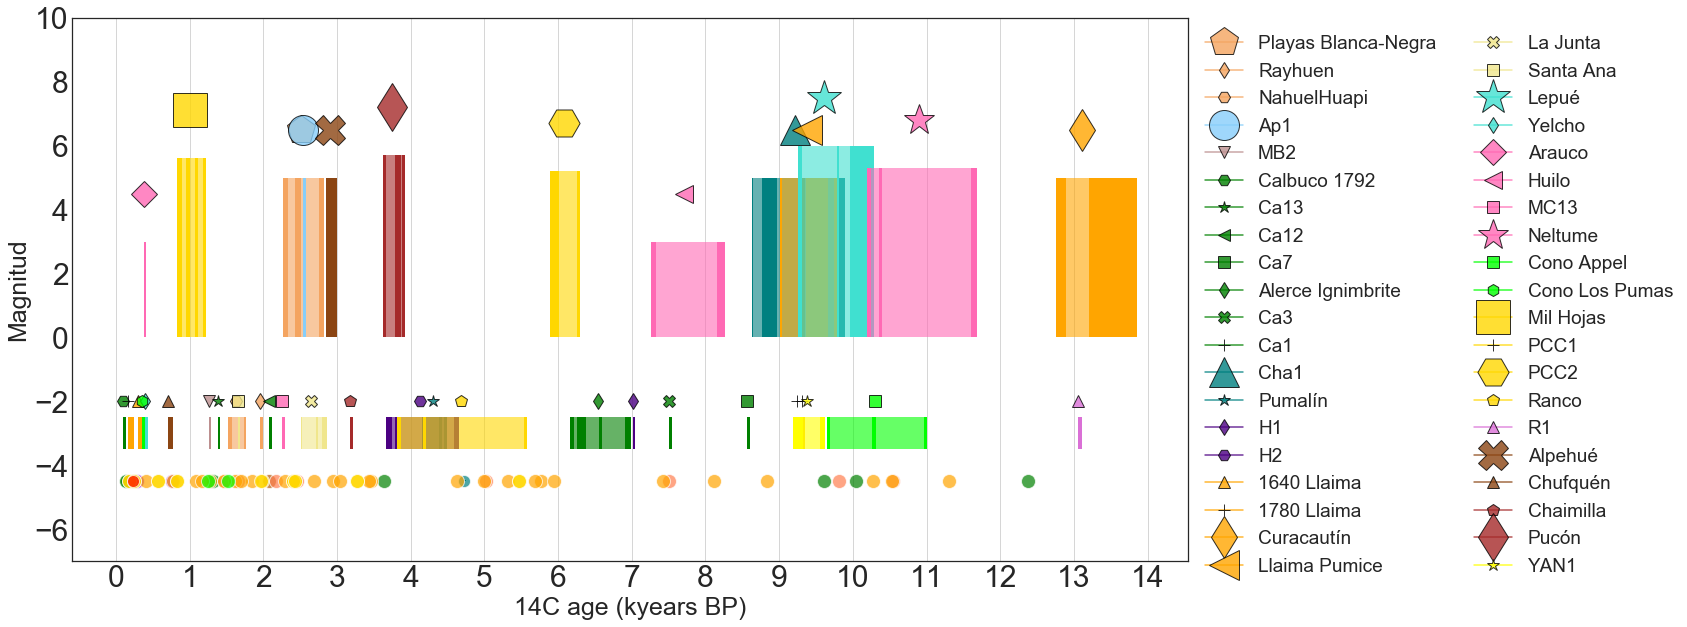

In [3]:
Data = Data.dropna(subset=['Edad'])
print('\033[1m'+ 'Materials dated by radiocarbon: '+ '\033[0m')
print(Data.MaterialMedido.unique())
DatA = Data[(Data.MaterialMedido == 'Charcoal')|(Data.MaterialMedido == 'Wood')|(Data.MaterialMedido == 'Charred wood')|(Data.MaterialMedido == 'Wood (center of branch)')|(Data.MaterialMedido == 'Wood (outside of branch)')|(Data.MaterialMedido == 'Partially burned wood')|(Data.MaterialMedido == 'Wood (outside of branch)')|(Data.MaterialMedido == 'Wood (outside of branch)')]

print(" ")
print('\033[1m'+ 'Ages obtained by measuring Charcoal, Wood, Charred wood'+ '\033[0m')
#print(DatA.Edad)
#print(Data.MaterialMedido.unique())
grafico_edades(DatA)

Additionally, the data is flagged, so we can filter the falgged data

../Scripts\funciones.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Data['Historic'] = Data['Edad'].str.contains('Historic')
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0, flags=flags)


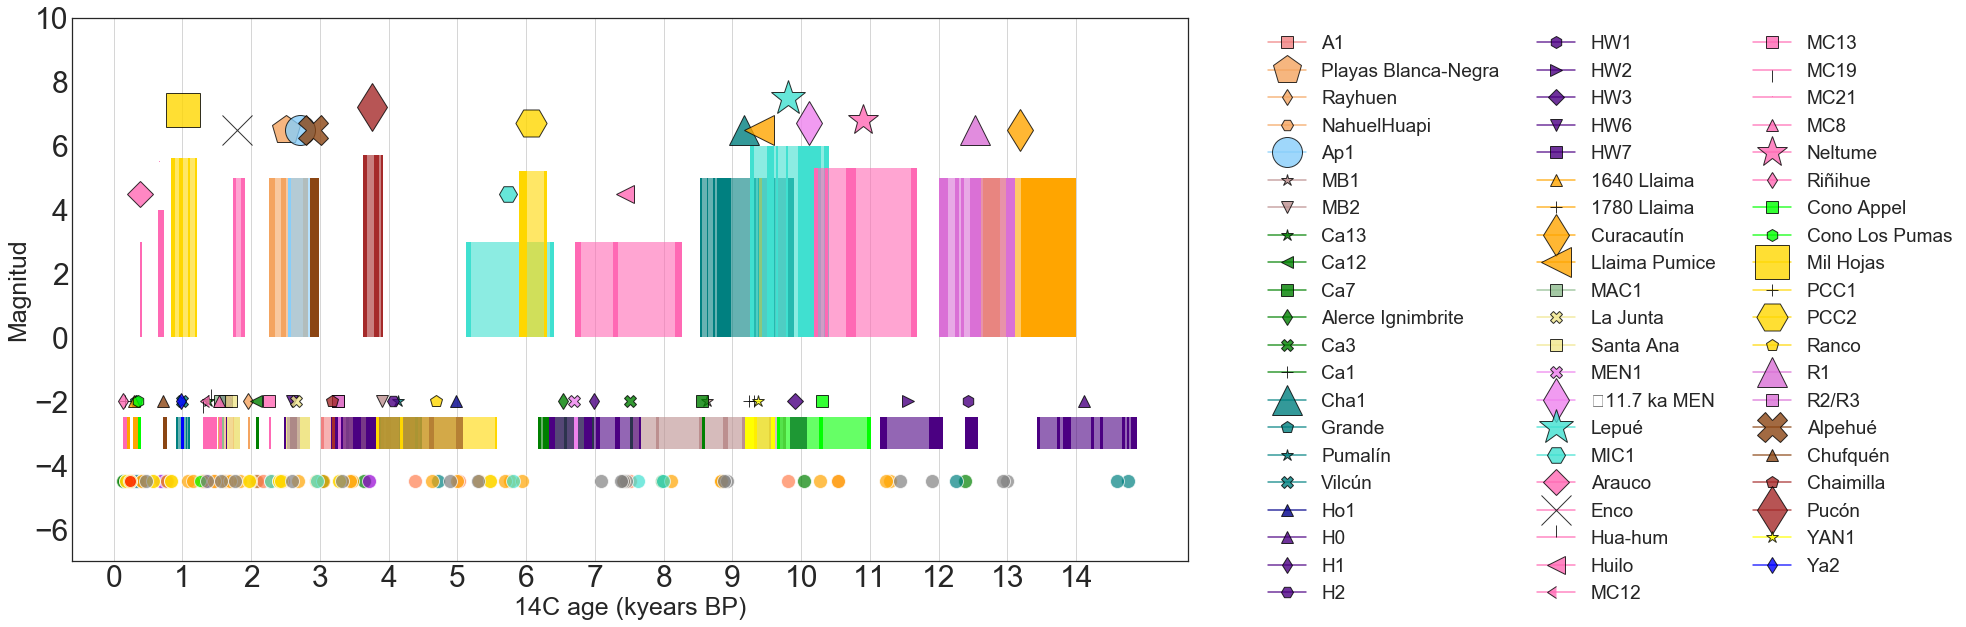

In [4]:
Data = Data.dropna(subset=['Edad'])
DatA = Data[(Data.Flag != 1)]
grafico_edades(DatA)

Volcán Aguilera
['A1']


../Scripts\funciones.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Data['Historic'] = Data['Edad'].str.contains('Historic')


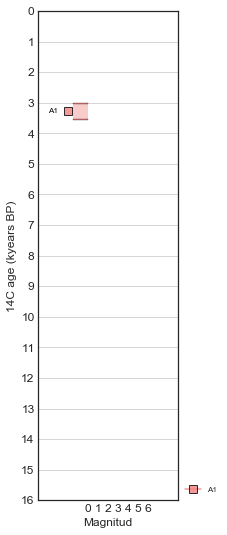

Volcán Antillanca-Casablanca
['Playas Blanca-Negra' 'Rayhuen' 'NahuelHuapi' 'Unknown']


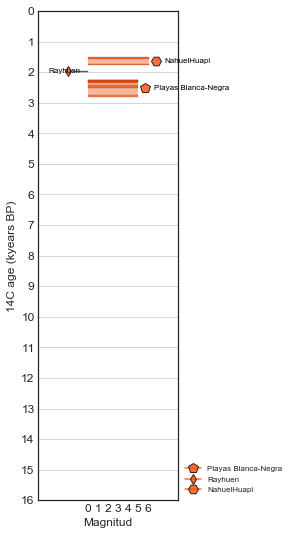

Volcán Apagado
['Ap1']


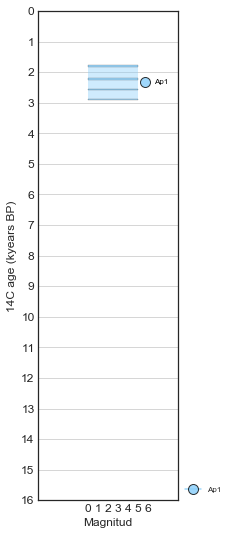

No radiocarbon ages have been measured/are included in the database for volcano Arenales
 
Volcán Burney
['MB1' 'MB1910' 'MB2' 'Unknown']


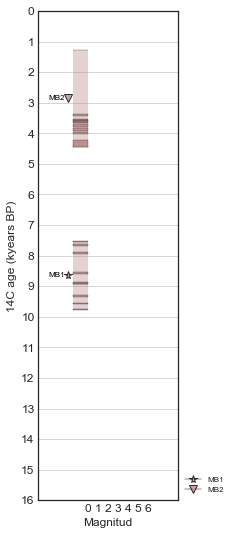

No handles with labels found to put in legend.


Volcán Caburga-Huelemolle
['Unknown']


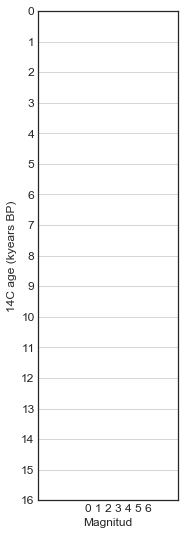

Volcán Calbuco
['Ca4' 'Ca5' 'Ca8' 'Ca10' 'Alerce Ignimbrite' 'Calbuco 2015'
 'Calbuco 1929' 'Calbuco 1961' 'Calbuco 1971?' 'Calbuco 1792'
 'Calbuco 1893' 'Ca13' 'Ca12' 'Ca7' 'Ca3' 'Ca1' 'Unknown']


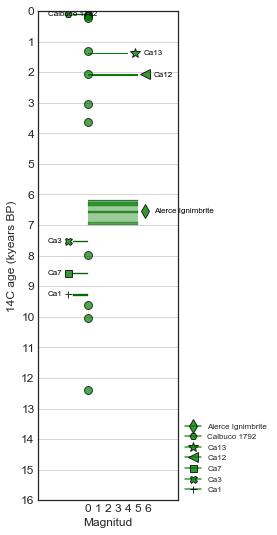

No handles with labels found to put in legend.


Volcán Carrán-Los Venados
['Carrán1955' 'Riñinahue1907' 'Unknown']


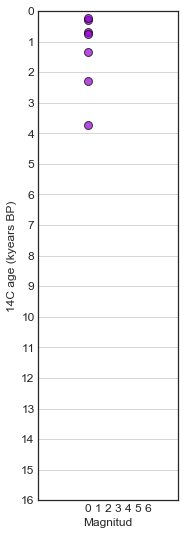

No handles with labels found to put in legend.


Volcán Cay
['Unknown']


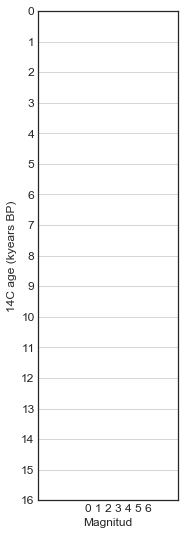

Volcán Chaitén
['Cha1' 'Cha3' 'Cha4' 'Grande' 'Puma Verde' 'Pumalín' 'Unknown'
 'Vcha-2008' 'Vilcún']


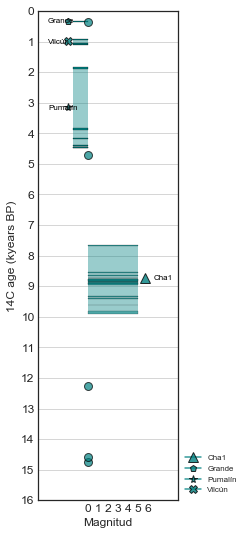

Volcán Corcovado
['COR2' 'COR3' 'Unknown']


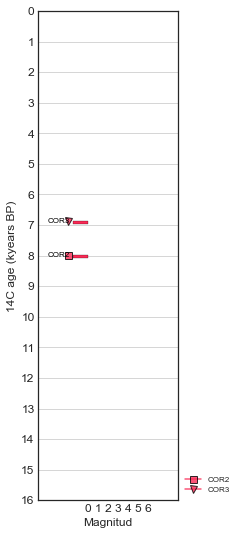

No radiocarbon ages have been measured/are included in the database for volcano Fueguino
 
Volcán Hornopirén
['Ho1' 'Unknown' 'HoSc']


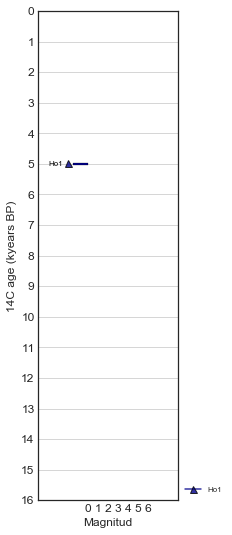

No handles with labels found to put in legend.


Volcán Huanquihue Group
['Achen' 'HUA1']


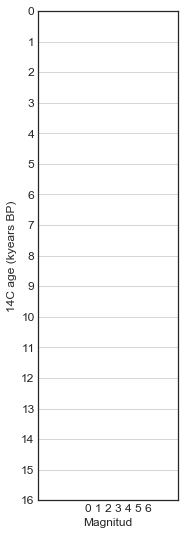

Volcán Hudson
['Hudson1991' 'Hudson1971' 'H0' 'H1' 'H2' 'HW1' 'HW2' 'HW3' 'HW6' 'HW7'
 'Unknown']


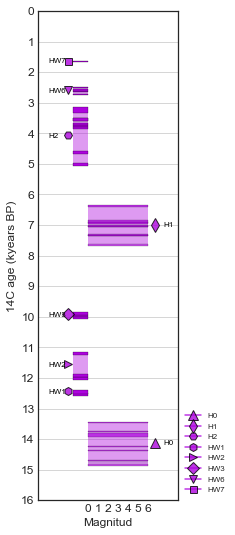

No handles with labels found to put in legend.


Volcán Huequi
['T1' 'T2' 'Unknown']


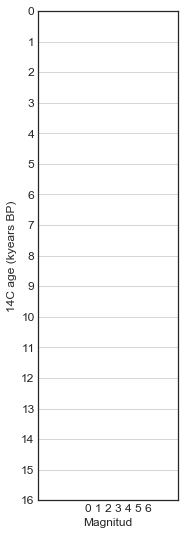

No handles with labels found to put in legend.


Volcán Lanín
['Lan1' 'Lan2' 'Unknown']


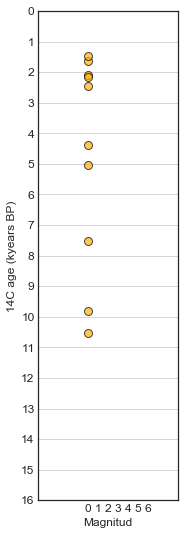

Volcán Llaima
['1640 Llaima' '1751 Llaima' '1780 Llaima' '1852 Llaima' '1903 Llaima'
 '1945 Llaima' '1957 Llaima' '1994 Llaima' '2008 Llaima' 'Curacautín'
 'Llaima Pumice' 'Unknown']


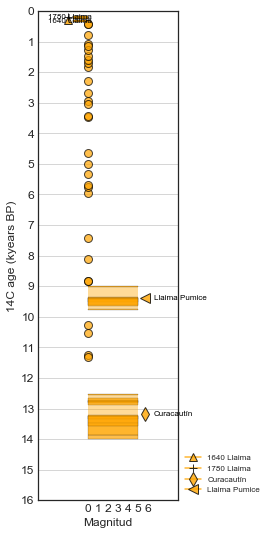

No radiocarbon ages have been measured/are included in the database for volcano Lautaro
 
Volcán Maca
['Unknown' 'MAC1']


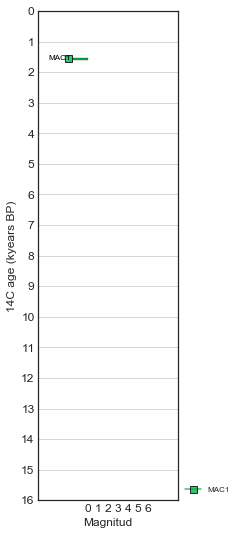

Volcán Melimoyu
['La Junta' 'Unknown' 'Santa Ana']


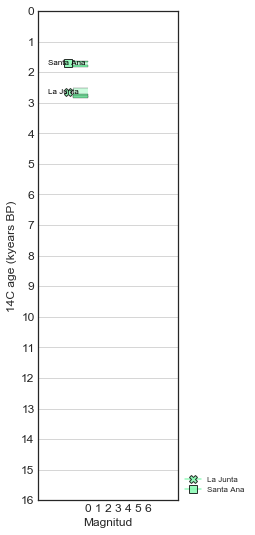

Volcán Mentolat
['MEN-1' 'MEN1' '∼11.7 ka MEN' 'MENo' 'Unknown']


C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\consu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8764 missing from current font.
  font.set_text(s, 0, flags=flags)


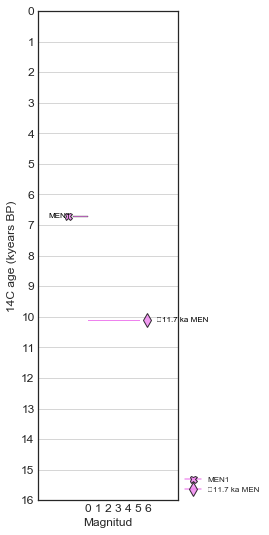

Volcán Michinmahuida
['Lepué' 'MIC1' 'Unknown' 'Yelcho']


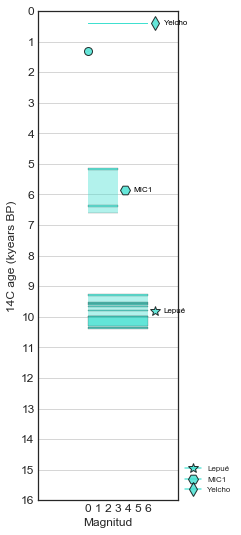

Volcán Mocho-Choshuenco
['Arauco' 'Enco' 'Hua-hum' 'Huilo' 'MC1' 'MC10' 'MC11' 'MC12' 'MC13'
 'MC14' 'MC19' 'MC2' 'MC20' 'MC21' 'MC22' 'MC24' 'MC26' 'MC27' 'MC3' 'MC6'
 'MC7' 'MC8' 'Neltume' 'Pirehueico' 'Riñihue' 'Unknown']


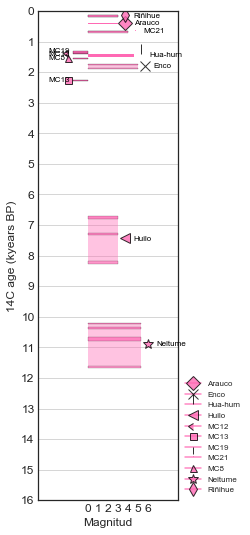

Volcán Osorno
['Osorno1545' 'Cono Appel' 'Cono Los Pumas' 'Osorno1835' 'Unknown']


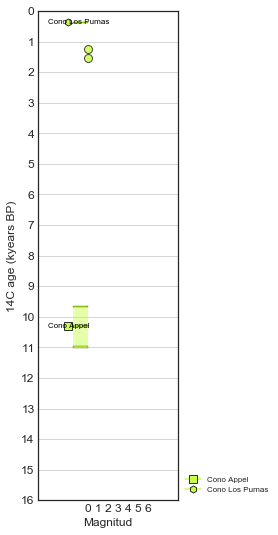

Volcán Puyehue-Cordón Caulle
['Mil Hojas' 'PCC1' 'PCC1922' 'PCC1960' 'PCC2' 'PCC2011' 'PCC4' 'Ranco'
 'North Cordón Caulle' 'Unknown']


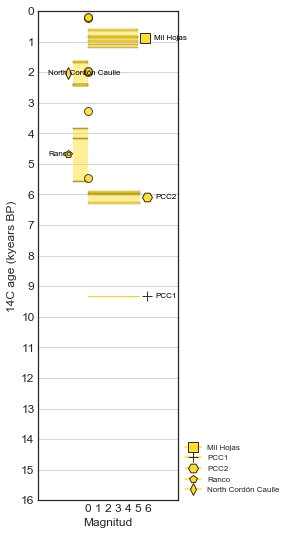

Volcán Quetrupillán
['Puesco' 'Quet1' 'Quet2' 'Quet3' 'Quet5' 'Quet6' 'Unknown']


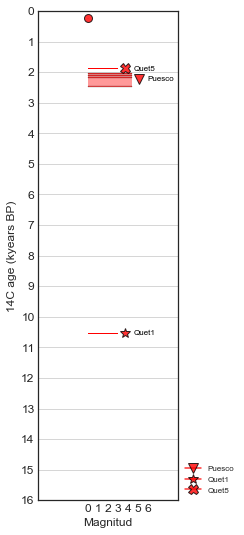

Volcán Reclus
['R1' 'R2/R3' 'Unknown']


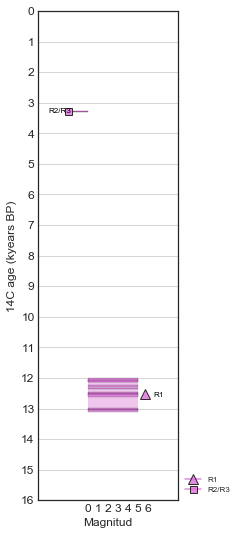

Volcán Sollipulli
['Alpehué' 'Chufquén']


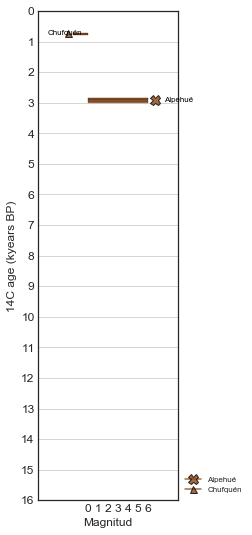

No radiocarbon ages have been measured/are included in the database for volcano Tronador
 
No radiocarbon ages have been measured/are included in the database for volcano Viedma
 
Volcán Villarrica
['Chaimilla' 'Licán' 'Pucón' 'Unknown' 'Villarrica 1971' 'Villarrica 1984']


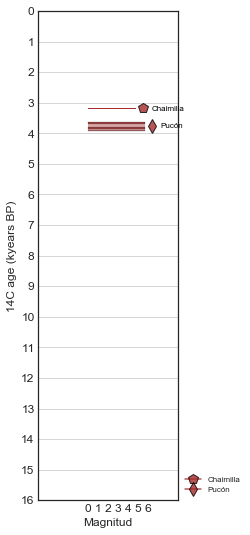

No radiocarbon ages have been measured/are included in the database for volcano Puntiagudo
 
Volcán Yanteles
['YAN1' 'Unknown']


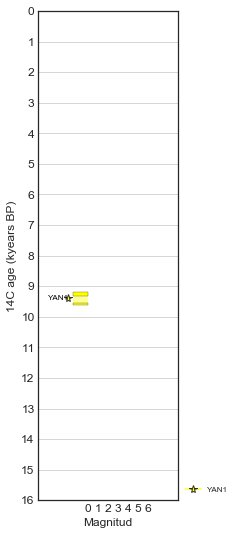

Volcán Yate
['Unknown' 'Ya1' 'Ya2']


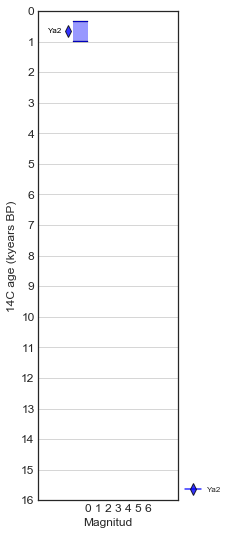

No radiocarbon ages have been measured/are included in the database for volcano MD07-3088
 
No radiocarbon ages have been measured/are included in the database for volcano MD07-3081
 
No radiocarbon ages have been measured/are included in the database for volcano MD07-3119
 
No radiocarbon ages have been measured/are included in the database for volcano MD07-3082
 


In [8]:
Volcanes = pd.read_excel("../Scripts/Volcanes.xlsx")
Volcanes = Volcanes[(Volcanes.Volcan != 'MD07-3098')&(Volcanes.Volcan != 'MD07-3100')]
#Data = Data[Data.Flag != 1] #only plot robus data

for i in Volcanes.Volcan:
    DataN = Data[Data.Volcan == i]
    if DataN.empty != True:
        print('\033[1m'+'Volcán {}'.format(i)+ '\033[0m')
        print(DataN.Evento.unique())
        grafico_edades(DataN)
    else: 
        print('No radiocarbon ages have been measured/are included in the database for volcano'+'\033[1m'+' {}'.format(i)+'\033[0m')
        print(" ")

../Scripts\funciones.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Data['Historic'] = Data['Edad'].str.contains('Historic')


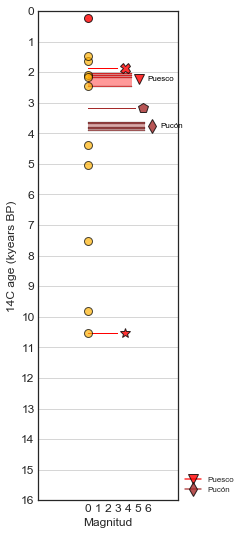

In [3]:
Data = pd.read_excel("../Data/TephraDataBase.xlsx")
DataN = Data[(Data.Volcan == 'Villarrica')|(Data.Volcan == 'Lanín')|(Data.Volcan == 'Quetrupillán')]
#DataN = DataN[(DataN.SubSeccion == 'LTT-18')]
#DataN = DataN[(DataN.SubSeccion == 'LTT-18')|(DataN.Volcan == 'Michinmahuida')|(DataN.Volcan == 'Hudson')|(DataN.Volcan == 'Yate')]
#print(DataN.Volcan.unique())
grafico_edades(DataN)

['Bulk Tephra' 'Lapilli' 'Bomb' 'Lava' 'Charcoal' 'Wood' 'Scoria' 'Pumice'
 'PJB' 'Bloque' 'Organic matter' 'Organic silt' 'Charred wood'
 'Glass shards' 'Bulk pumice' 'Bulk sediment' 'Bulk ash'
 'Accrecionary lapilli' 'Soil Organic matter' 'Whole rock' 'Bulk gytja'
 'Bulk Higly carbonac. Muds' 'Bulk carbonac. Muds' 'Peat' nan 'Bulk Glass']


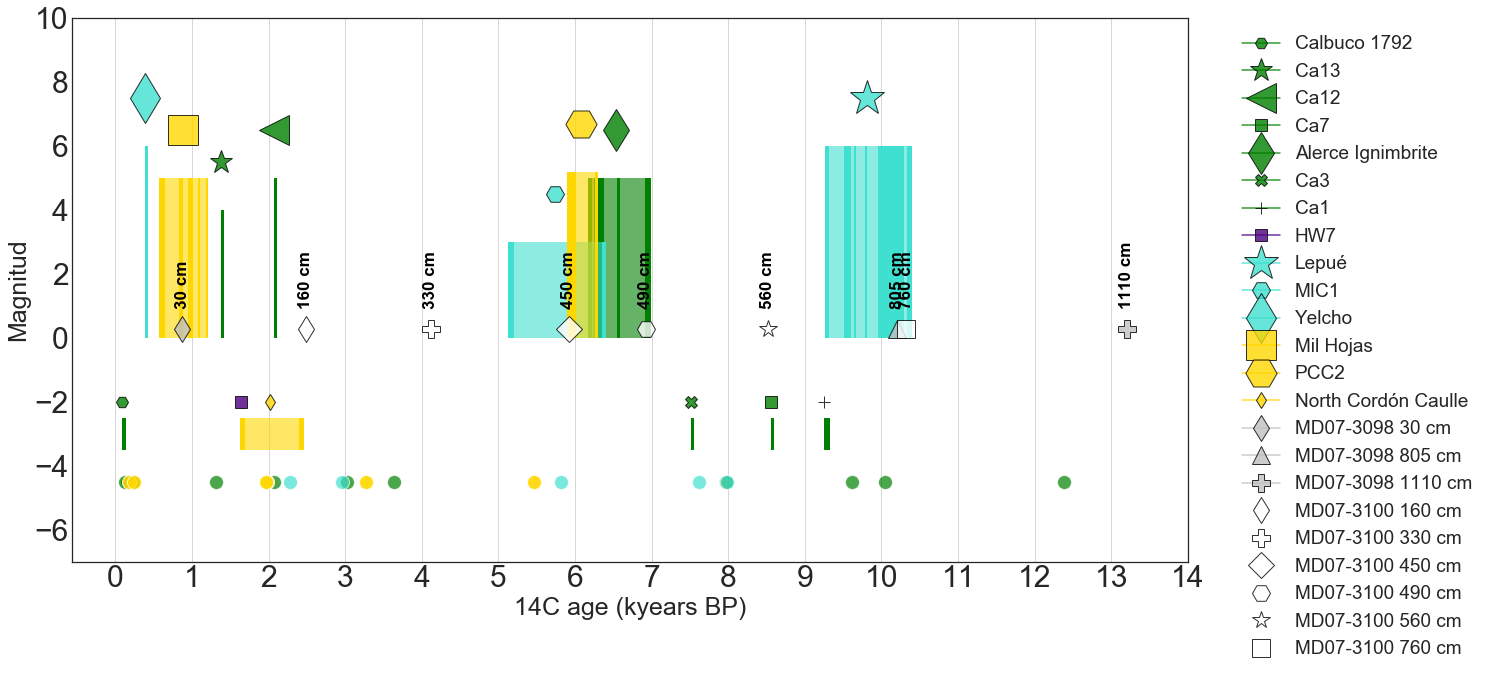

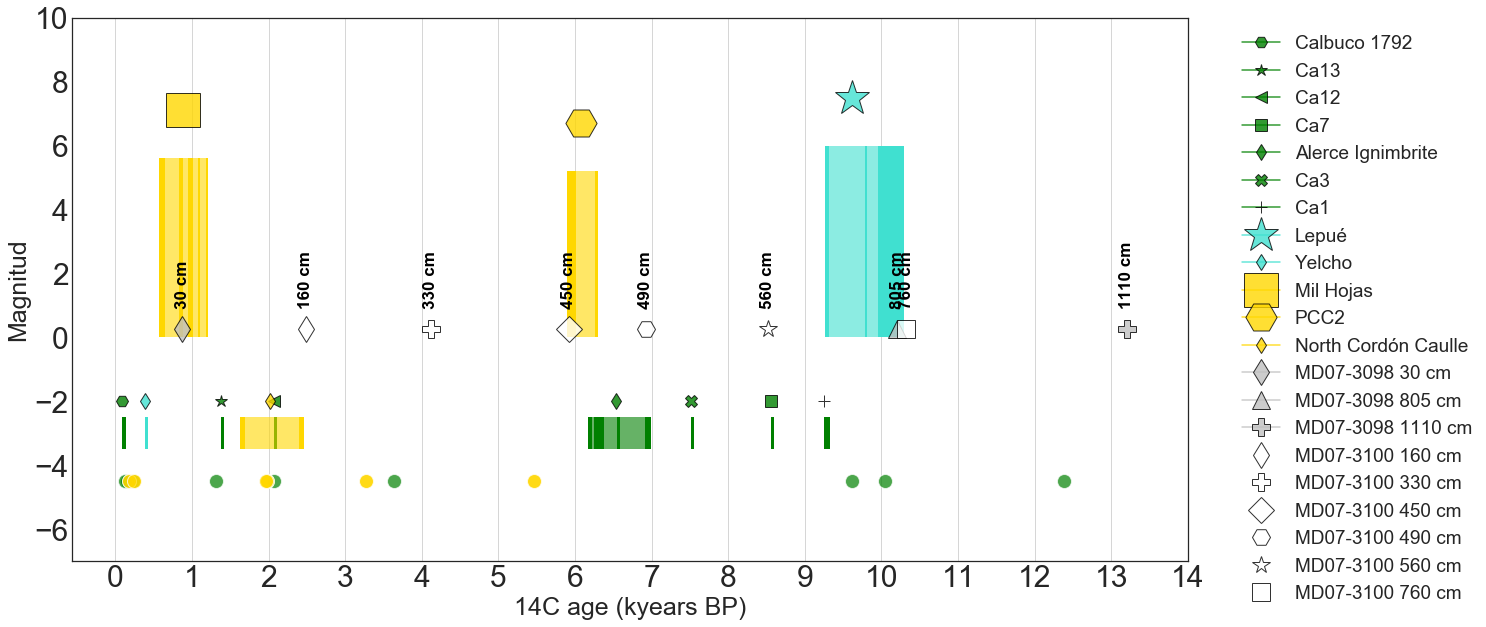

In [21]:
Data_cores = pd.read_excel('../Data/DataCores.xlsx')
Data_cores = Data_cores.replace(np.nan,-1)
Data_cores = Data_cores[Data_cores.Edad != -1]
Data_cores = Data_cores[((Data_cores.Core == "MD07-3098")&((Data_cores.Depth == "805 cm")|(Data_cores.Depth == "30 cm")|(Data_cores.Depth == "1110 cm")))|((Data_cores.Core == "MD07-3100")&((Data_cores.Depth == "160 cm")|(Data_cores.Depth == "450 cm")|(Data_cores.Depth == "490 cm")|(Data_cores.Depth == "760 cm")|(Data_cores.Depth == "550 cm")|(Data_cores.Depth == "330 cm")|(Data_cores.Depth == "560 cm")))]
Data_cores = Data_cores.reset_index(drop=True)

Data = pd.read_excel("../Data/TephraDataBase.xlsx")
Data = Data[(Data.Evento == 'HW7')|(Data.Volcán == 'Puyehue-Cordón Caulle')|(Data.Volcán == 'Calbuco')|(Data.Volcán == 'Michinmahuida')]
print(Data.MaterialMedido.unique())
grafico_edades(Data,Data_cores)

Data = Data[(Data.MaterialMedido == 'Charcoal')|(Data.MaterialMedido == 'Wood')|(Data.MaterialMedido == 'Charred wood')]

grafico_edades(Data,Data_cores)

In [12]:
fig = px.violin(Data, y="14C_Age", x="Event", color="Volcano",violinmode='overlay', box=True, points="all", hover_data=['Magnitude'])
fig.show()

In [15]:
#Data = pd.read_excel("../Data/TephraDataBase.xlsx")
#Data = Data[Data.Volcan.isin(['Carrán-Los Venados','Puyehue-Cordón Caulle'])]
#Data = Data[(Data.Volcan != 'Unknown')&(Data.Volcan != 'Burney')&(Data.Volcan != 'Reclus')&(Data.Volcan != 'Aguilera')]
fig = px.violin(Data, y="14C_Age", x="Volcano",violinmode='overlay',
                color="Event", box=True, points="all", hover_data=['Event'], width = 900, height = 700)
fig.update_yaxes(autorange="reversed")
fig.show()

In [6]:
Data_Magnitud = Data

for volcan in Data.Volcan.unique():
    #print('Volcan {}'.format(volcan))
    temp0 = Data[Data.Volcan == volcan]
    #print(volcan)
    for evento in temp0.Evento.unique():
        #print(evento,temp0.Evento.unique())
        temp = temp0[temp0.Evento== evento]
        #Color, Marker  = simbologia(temp.Volcan[Index],temp.Evento[Index])
        magnitud = scipy.stats.mode(temp.Magnitud)
        print(magnitud)
        Data_Magnitud[(Data_Magnitud.Volcan == volcan)&(Data_Magnitud.Evento == evento)].Magnitud.fillna(magnitud)
        #print(A); print(B);print(Marker, Color)
       
fig = px.scatter(Data_Magnitud, x="Edad", y="Magnitud", color="Volcan",
           hover_name="Evento", size_max=60)
fig.show()

ModeResult(mode=array([nan]), count=array([1]))


TypeError: "value" parameter must be a scalar or dict, but you passed a "ModeResult"

In [4]:
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
	          	          
def grafico_edades(Data,Data_cores ='default',save=False,nombre='default'):
    plt.figure(figsize=(2.5,9))
    ax = plt.axes()
    
    Data_magnitud = Data.copy()
    Data_magnitud.Magnitud = Data_magnitud.Magnitud.replace(np.nan,0)
    Data.Edad = Data.Edad.replace(np.nan,'Historic')
    Data['Historic'] = Data['Edad'].str.contains('Historic')
    Data = Data[Data['Historic']!= True]
    Data = Data.reset_index(drop=True)
    Data.Edad = Data.Edad.values/1000
    Data.ErrorEdad = Data.ErrorEdad.values/1000
    Eventos = Data['Evento'].values
    Volcanes = Data['Volcan'].values
    Sample = Data['SampleID'].values
    i = 0
    j = 0
    k = 0
    #print(Eventos)
    while i < np.size(Eventos):

        #print("0 {}, {}".format(Eventos[i],Volcanes[i]))
        Color, Marker  = simbologia(Volcanes[i],Eventos[i])
        marker_edge = 'black'
        Data_evento = Data.loc[Data['Volcan'] == Volcanes[i]]  
        Data_evento = Data_evento.sort_values(by=['Evento'])	
        Data_evento = Data_evento.loc[Data_evento['Evento'] == Eventos[i]]
        Data_magnitud_evento = Data_magnitud.loc[Data_magnitud['Volcan'] == Volcanes[i]]
        Data_magnitud_evento = Data_magnitud_evento.loc[Data_magnitud_evento['Evento'] == Eventos[i]]
        Magnitud = scipy.stats.mode(Data_magnitud_evento.Magnitud)
        Magnitud = Magnitud[0]
        
        if Data_evento.shape[0] != 1: #Eventos con más de una datación 14C
            
            #print("1 {}, {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i],Magnitud))
            if Eventos[i] != 'Unknown': #Es un evento con un nombre asignado 
                if Magnitud==0: #la magnitud del evento es desconocida
                    #print("2 {}, {}, {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i],Data_evento['Edad'].min(),Data_evento['Edad'].max()))
                    rect = ptch.Rectangle((0,Data_evento['Edad'].min()),1.5,Data_evento['Edad'].max()-Data_evento['Edad'].min(), facecolor = Color,alpha=0.4,linewidth = 0.25)
                    simbolo = ax.plot(-2,Data_evento['Edad'].min() +(Data_evento['Edad'].max()-Data_evento['Edad'].min())/2, color = Color, marker = Marker, markersize=8,markeredgecolor=marker_edge, label=Eventos[i],alpha=0.8)
                    #ax.text(-4,Data_evento['Edad'].min() +(Data_evento['Edad'].max()-Data_evento['Edad'].min())/2+.07,Eventos[i],rotation=0,color='black',fontsize=8)
                    ax.add_patch(rect)
                    while j < Data_evento.shape[0]:
                        rect = ptch.Rectangle((0,Data_evento.Edad.values[j]),1.5,Data_evento.ErrorEdad.values[j],facecolor = Color,edgecolor='black',linewidth = 0.25)
                        j=j+1
                        ax.add_patch(rect) 
                else: #la magnitud del evento es conocida
                    #print("3 {}, {}, {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i],Data_evento['Edad'].min(),Data_evento['Edad'].max()))
                    rect = ptch.Rectangle((-Magnitud/2,Data_evento['Edad'].min()),Magnitud/2,Data_evento['Edad'].max()-Data_evento['Edad'].min(),facecolor = Color,alpha=0.4,linewidth = 0.25)
                    simbolo = ax.plot(Magnitud+.7,Data_evento['Edad'].min() +(Data_evento['Edad'].max()-Data_evento['Edad'].min())/2,color = Color, marker = Marker, markersize=10,markeredgecolor=marker_edge, label=Eventos[i],alpha=0.8)
                    #ax.text(Magnitud+1.6,Data_evento['Edad'].min() +(Data_evento['Edad'].max()-Data_evento['Edad'].min())/2+.07,Eventos[i],rotation=0,color='black',fontsize=8)
                    ax.add_patch(rect)
                    while j < Data_evento.shape[0]:
                        rect = ptch.Rectangle((-Magnitud/2,Data_evento.Edad.values[j]),Magnitud/2,Data_evento.ErrorEdad.values[j],facecolor = Color,alpha=.7,edgecolor='black',linewidth = 0.25)
                        j=j+1
                        ax.add_patch(rect)
            else: #son varias dataciones de un Volcan pero no se sabe el evento
                 while j < Data_evento.shape[0]:
                    #print("4 {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i]))
                    rect = ptch.Rectangle((0,Data_evento.Edad.values[j]),Magnitud,Data_evento.ErrorEdad.values[j], facecolor = Color,linewidth = 0.25)
                    simbolo = ax.plot(0,Data_evento.Edad.values[j], color = Color, marker = Marker, markersize=8,markeredgecolor='black',alpha=0.7)
                    j=j+1
                    ax.add_patch(rect)
        else: #Eventos con una datación 14C
            #print("-0 {}".format(Eventos[i]))			
            if Eventos[i] != 'Unknown': #Es un evento con un nombre asignado 
                if Magnitud==0: #la magnitud del evento es desconocida
                    #print("5 {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i]))
                    simbolo = ax.plot(0,Data_evento['Edad'].min(),color = Color, marker = Marker, markersize=7,markeredgecolor=marker_edge, alpha=0.8, label=Eventos[i])
                    rect = ptch.Rectangle((0,Data_evento['Edad'].min()),1.5,Data_evento.ErrorEdad.values[j], facecolor = Color,edgecolor='black',linewidth = 0.25) #este rectangulo es para que el codig no reclame por el addpatch
                    #ax.text(-4,Data_evento['Edad'].min() +(Data_evento['Edad'].max()-Data_evento['Edad'].min())/2+.07,Eventos[i],rotation=0,color='black',fontsize=8)
                    ax.add_patch(rect)
                else: #la magnitud del evento es conocida
                    #print("6 {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i]))
                    rect = ptch.Rectangle((-Magnitud/2,Data_evento['Edad'].min()), Magnitud/2, Data_evento.ErrorEdad.values[j], facecolor = Color,linewidth = 0.25)
                    simbolo = ax.plot(Magnitud+.7, Data_evento['Edad'].min(), color = Color, marker = Marker, markersize=10,markeredgecolor=marker_edge, alpha=0.8, label=Eventos[i])
                    #ax.text(Magnitud+1.6,Data_evento['Edad'].min()+.07,Eventos[i],rotation=0,color='black',fontsize=8)
                    ax.add_patch(rect)
            else: #una datación de un evento unknown
                    #print("7 {}, {}, {}".format(Eventos[i],Volcanes[i],Data.SamplePoint[i]))
                    rect = ptch.Rectangle((0,Data_evento.Edad.values[j]), 0.05 ,Data_evento.ErrorEdad.values[j], facecolor = Color,alpha=1,edgecolor='black',linewidth = 0.25)
                    simbolo = ax.plot(0,Data_evento.Edad.values[j], color = Color, marker = Marker, markersize=8,markeredgecolor='black',alpha=0.8)
                    ax.add_patch(rect)
                    
        #ax.add_patch(rect)
        #txt = ax.text(Data_evento['Edad'].min(),Magnitud[i]+1.5 ,Evento[i],weight='bold',color='black')
        #txt.set_rotation(45)
        i = i+ Data_evento.shape[0]
        j = 0
        #print(i)		
    #print(Data_cores)
	
    if isinstance(Data_cores, pd.DataFrame):
        Data_cores = Data_cores.dropna(axis = 'rows',subset=(['Edad']))
        Data_cores = Data_cores.reset_index(drop=True)
        Data_cores.Edad = Data_cores.Edad.values/1000
        Data_cores.ErrorEdad = Data_cores.ErrorEdad.values/1000
        Depth = Data_cores['Depth']
        Core = Data_cores['Core']	
    
        while k < (len(Data_cores)):
            Color, Marker  = simbologia_core(Core[k],Depth[k])
            simbolo = ax.plot( 0,Data_cores.Edad.values[k], color = Color, marker = Marker, markersize=12,markeredgecolor='black',alpha=1,label=Data_cores.Label[k])
            #txt = ax.text(0.1,Data_cores.Edad.values[k]-0.1,Data_cores.Depth.values[k],rotation=90,weight='bold',color='black',fontsize=17)
            k = k+1    
    
    #tags de qué representa cada línea
    #conMagnitud = ax.text(18000,4,'Eventos con Magnitud estimada',weight='bold',color='black',fontsize=15)
    #sinMagnitud = ax.text(18000,-2,'Evento sin Magnitud estimada',weight='bold',color='black',fontsize=15)
    #unknown = ax.text(18000,-4,'Evento Unknown',weight='bold',color='black',fontsize=15)
    
        
    ax.set_ylabel('14C age (kyears BP)', fontsize=12)
    ax.set_xlabel('Magnitud', fontsize=12)
    ax.invert_yaxis()
    #ax.set_xticklabels((np.linspace(0,15,6),0))
    ax.tick_params(labelsize = 12)

    #if Data.Evento.unique().size > 60:
    #    leg=ax.legend(loc='upper right', fancybox=True, bbox_to_anchor=(1.7,1),ncol=3,fontsize=19)
        
    #if (Data.Evento.unique().size > 20)&(Data.Evento.unique().size < 60):
    #    leg=ax.legend(loc='upper right', fancybox=True, bbox_to_anchor=(1.45,1),ncol=2,fontsize=19)
        
    #if (Data.Evento.unique().size < 20):
    #    leg=ax.legend(loc='upper right', fancybox=True, bbox_to_anchor=(1.27,1),ncol=1,fontsize=19)
     
    ax.legend(loc='lower left', fancybox=True, bbox_to_anchor=(1,0),ncol=2,fontsize=10)	 
    #leg.get_frame().set_alpha(0.5)
    plt.yticks(np.linspace(0,16,17))
    plt.xticks(np.linspace(0,6,7))
    ax.grid(axis ='y')
    #ax[0].set_yscale("log")
    ax.set_xlim(-5,9)
        
    if save:
        plt.savefig('../Plots/' + nombre +'.pdf',dpi = 300,bbox_inches='tight')
    
    plt.show()

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as ptch

NameError: name 'simbologia_core' is not defined

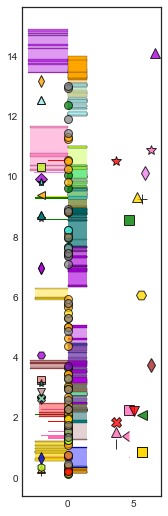

In [7]:
Data = pd.read_excel("../Data/TephraDataBase.xlsx")
##Grupo 1
#Volcanes
Data = Data[((Data.Volcan == "Michinmahuida")&(Data.Evento != "Yelcho"))|(Data.Volcan == "Melimoyu")|(Data.Volcan == "Hudson")|(Data.Volcan == "Quetrupillán")|(Data.Volcan == "Yate")]
#Erupciones

##Grupo 2
#Volcanes
Data = Data[Data.Volcan.isin(['Puyehue-Cordón Caulle','Antillanca-Casablanca','Yate'])]#|(Data.SampleID == 'P929-930; L247-3')
#Erupciones

##Grupo 3
#Volcanes
#Erupciones




Data_cores = pd.read_excel('../Data/DataCores.xlsx')
Data_cores = Data_cores[Data_cores.Label.isin(['T1/100','T3/100','T5/100','T6/100','T8/100','T6/98','T8/98'])]
grafico_edades(Data, Data_cores,save=True)